# Final quiz, 3 of 3

## Decision Trees, Random Forests, and Neural Networks

### Instructions:

Step through this jupyter notebook and write code to complete the instructed tasks.  
Questions in the notebook are mirrored in the quiz on Canvas. Submit answers to the  
questions on Canvas. When you are done, restart your notebook and run all the cells.  
Save your notebook **without clearing the output**. Download your saved notebook  
(if you are working on jupyterhub rather than locally) and submit the file on Canvas.

In [1]:
# We'll import that tools you'll need.
# You may import additional tools if you wish to.
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

## Digit recognition

In our neural network exercise, we trained a NN for classifying images of handwritten digits. We'll do the same here, using trees and forests. Our image sizes will be smaller than those we used for the NN exercise, to allow for faster processing. Images are 8x8 pixels, which are flattened into 64 features.

### Part 1 of 3

### Train a decision tree classifier

The cell below will load the data set. Add code to the cell and run it, to help you answer the following questions.

**Q6: How many samples are in the data set?**

---
Split your data into 80% training and 20% testing sets. **In your call to ```train_test_split()```, set the random_state parameter to 0, so you will get the same result as everyone else: ```random_state=0```.**

Construct and train a decision tree model on the data. Let the tree grow to have maximum depth (```max_depth=None```). **Again, set the random_state parameter to 0 (```random_state=0```).** (Although the training is largely deterministic, sklearn randomly selects a feature if two or more features would give equal Gini Impurity reduction at a split).

Train the tree on your training set and test it on the test set.

**Q7: What is the decision tree accuracy score for the test set?**

In [11]:
##################
## Part 1 of 2
##################
## Load the (flattened) digit images and labels
# X is a numpy array of pixels, with a shape of (num_samples, num_features)
# y is a numpy array of labels (digit numbers), with a shape of (num_samples)
(X, y) = datasets.load_digits(n_class=10, return_X_y=True)
# X.shape

# Show your work below. Submit your answers on Canvas.
# You may create additional cells to segment your work.
#######################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
decision_tree_classifier = DecisionTreeClassifier(max_depth=None, random_state=0)
decision_tree_classifier.fit(X_train, y_train)

decision_tree_classifier.score(X_test, y_test)


0.8472222222222222

### Part 2 of 3

### Train several random forest models

Add code to the cell below and run it, to help you answer the following questions.

---
**Model 1**:
Using the same training and test sets you created above, construct, train, and test a random forest classifier with the following parameters:
```
n_estimators=10
bootstrap=True
max_features='sqrt'
random_state=0
```
This creates a model that is a traditional RF model, including sample bagging (```bootstrap=True```) and feature _subset_ randomization (```max_features='sqrt'```).

**Q8: What is the RF Model 1 accuracy score for the test set?**


---
**Model 2**:
Using the same training and test sets you created above, construct, train, and test a random forest classifier with the following parameters:
```
n_estimators=10
bootstrap=False
max_features=64
random_state=0
```
This creates a model that **does not** randomly select subsets of samples and features. All the trees in the forest are nearly identical (the only difference being the random selection amongst feature that give equal reductions in Gini Impurity).

**Q9: What is the RF Model 2 accuracy score for the test set?**


---
**Model 3**:
Using the same training and test sets you created above, construct, train, and test a random forest classifier with the following parameters:
```
n_estimators=100
bootstrap=True
max_features='sqrt'
random_state=0
```
This is the same as Model 1 (a traditional RF model), except you'll use 100 trees rather than 10 trees. More trees often results in a better model.

**Q10: What is the RF Model 3 accuracy score for the test set?**

In [23]:
##################
## Part 2 of 3
##################
#
# Show your work below. Submit your answers on Canvas.
# You may create additional cells to segment your work.

# 8 
rf1 = RandomForestClassifier(n_estimators=10, bootstrap=True, max_features='sqrt', random_state=0)
rf1.fit(X_train, y_train)
rf1.score(X_test, y_test)


0.9444444444444444

In [24]:
rf2 = RandomForestClassifier(n_estimators=10, bootstrap=False, max_features=64, random_state=0)
rf2.fit(X_train, y_train)
rf2.score(X_test, y_test)

0.8833333333333333

In [25]:
rf3 = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=0)
rf3.fit(X_train, y_train)
rf3.score(X_test, y_test)

0.9694444444444444

### Plot the feature importance

Add code to the cell below and run it, to help you answer the following question.

---
Working with the trained Model 3, get the feature importance values from the model, and reshape them into an 8x8 array (matrix), so they are ordered like one of the 8x8 digit images (see code below to clarify). Then plot the importance matrix as an image.

**Q11: Which best describes the pattern exhibited by the matrix of feature importances?  
a. Pixels near the edges of the images are most important.  
b. Pixels near the edges of the images are least important.  
c. All pixels are nearly equally important. There is little variation.**

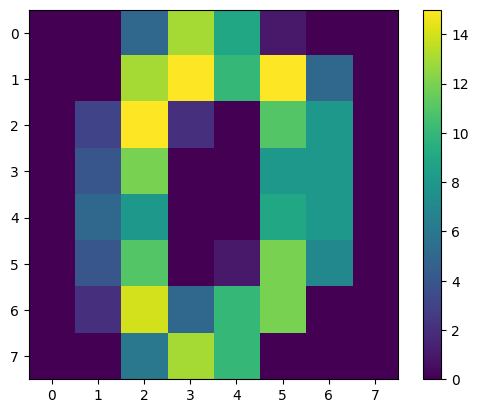

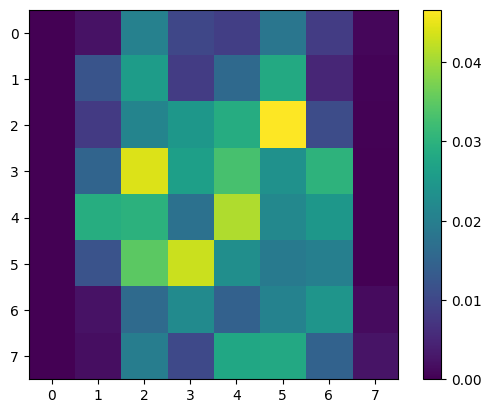

In [26]:
##################
## Part 3 of 3
##################
#
# Reshape the pixels of a sample into an 8x8 matrix, and plot.
digit_sample = X[0,:] # get single image sample
digit_matrix = np.reshape(digit_sample, (8, 8)) # reshape from 64 pixel vector to 8x8 pixel matrix
plt.figure()
plt.imshow(digit_matrix)
plt.colorbar()
#
# Show your work below. Submit your answers on Canvas.
# You may create additional cells to segment your work.

## Add to (edit) the code below to create the importance matrix as instructed above.
importances = rf3.feature_importances_
importance_matrix = importances.reshape(8, 8)
plt.figure()
plt.imshow(importance_matrix)
plt.colorbar()
